## Principal Component Analysis

    - unsupervised learning method
    - rank reduction
       * dimension-reduction tool that can be used to reduce a large set of variables 
         to a small set
    - to preserve original variace with dimensional reduction 

## Review: Eigenvalue and eigenvector

- Eigenvalue($\lambda$) and eigenvector(x): $Ax = \lambda x$ for square matrix $A$
- Example: 
    \begin{gather}
    A = 
     \begin{bmatrix}
        2 & 1\\
        1 & 2\\
     \end{bmatrix},  
    (A-\lambda I) =\begin{bmatrix}
        2-\lambda & 1\\
        1 & 2-\lambda\\
     \end{bmatrix}, det(A-\lambda I)=(2-\lambda)^2 -1 =0
    \end{gather} 
 
 $\Longrightarrow \lambda$ = 1, 3
 
    \begin{gather}
    (A-\lambda_1)
    \begin{bmatrix}
    x_1 \\ x_2
    \end{bmatrix}
    =\begin{bmatrix}
        2-1 & 1\\
        1 & 2-1\\
     \end{bmatrix} 
     \begin{bmatrix}
    x_1 \\ x_2
    \end{bmatrix},  
       (A-\lambda_2)
    \begin{bmatrix}
    x_1 \\ x_2
    \end{bmatrix}
    =\begin{bmatrix}
        2-3 & 1\\
        1 & 2-3\\
     \end{bmatrix} 
     \begin{bmatrix}
    x_1 \\ x_2
    \end{bmatrix}
     \end{gather}
     
     
  \begin{gather}
    v_{\lambda_1} = 
    \begin{bmatrix}
    1 \\ -1
    \end{bmatrix}, 
     v_{\lambda_2} = 
    \begin{bmatrix}
    1 \\ 1
    \end{bmatrix}
   \end{gather}  
     
 

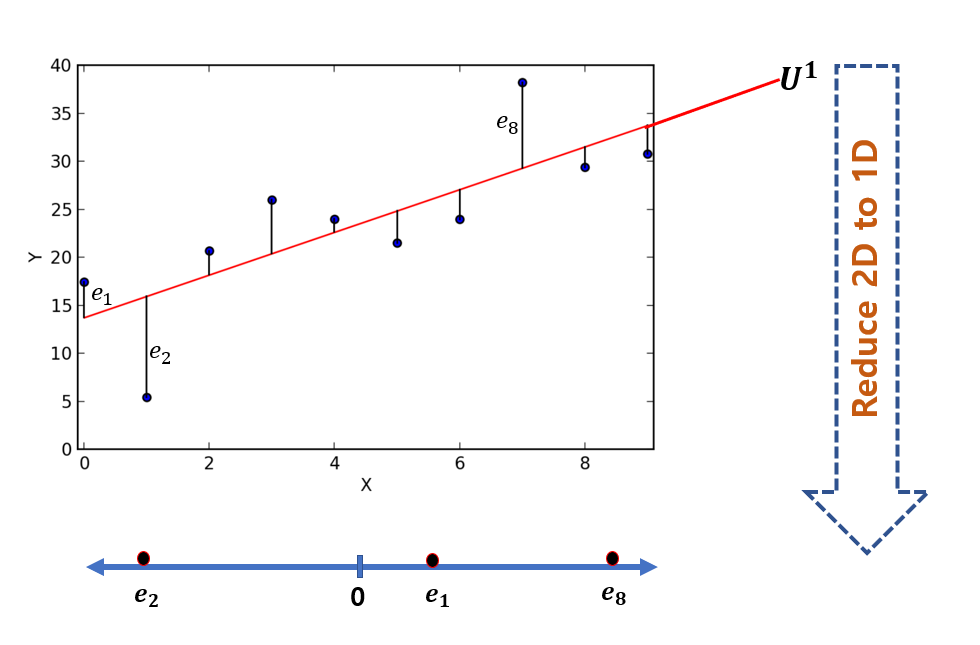

In [5]:
from IPython.display import Image
Image("c:/python/images/pac3_2.PNG")

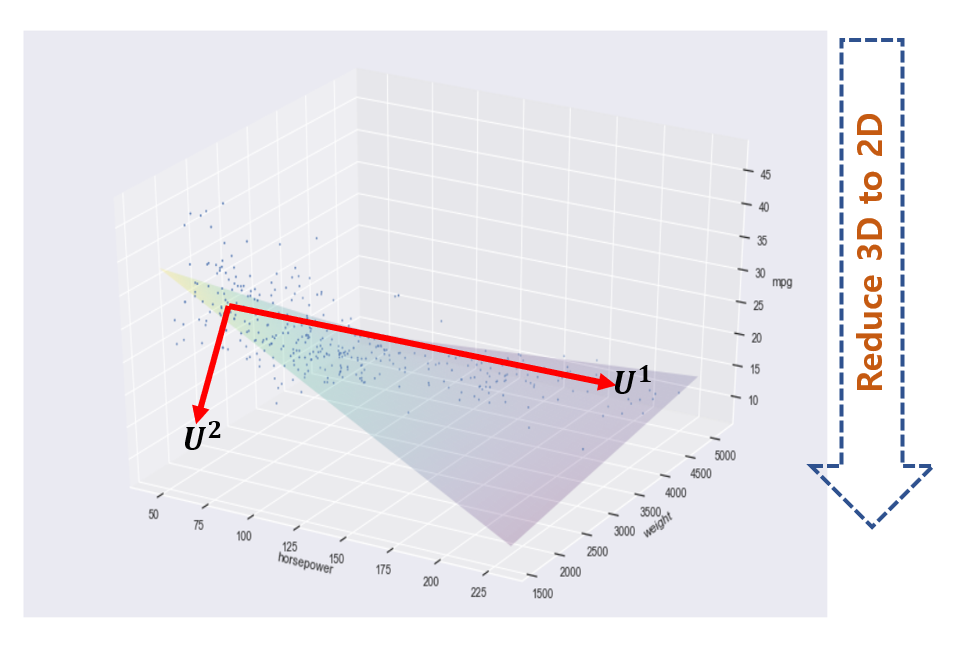

In [4]:
from IPython.display import Image
Image("c:/python/images/pca4_2.PNG")

## Standard Procedure

-  Standardized on the original data
-  Create correlation matrix of the standardized data
-  Find eigen vectors and values  of the correlation matrix
-  Determine the number of main principal component
-  Applying evaluation function

-  standardized : PCA is very sensitive to normalization or not 
    \begin{equation*}
      z_i = \frac{x_i -\bar{x}}{\sigma}
    \end{equation*}

- correlation matrix
    \begin{gather}
        \Sigma_z = 
            \begin{bmatrix}
                r_{11} & r_{12} & \cdots & r_{1n}\\
                r_{21} & r_{22} & \cdots & r_{2n}\\
                & \vdots & \\
                r_{n1} & r_{n2} & \cdots & r_{nn} 
            \end{bmatrix}
    \end{gather}

- Eigenvalue($\lambda's$) and Eigenvectors($Q$)

 \begin{gather}
        \Sigma_z = QRQ =
            Q\begin{bmatrix}
                \lambda_1 &  &  & \\
                          & \lambda_2 &  &\\
                &  & \ddots & \\
                &  &  & \lambda_p 
            \end{bmatrix} Q
    \end{gather}

-  Each Component's variance contribution

\begin{equation*}
     \frac{\lambda_k}{\sum_{i=1}^{p}\lambda_i }
\end{equation*}

-  In PCA should decide number of eigenvalue or explained variance
\begin{equation*}
    v_k = \frac{\sum_{i=1}^{k}\lambda_i }{\sum_{i=1}^{p}\lambda_i }  \ge 90\%
\end{equation*}

## PCA in a figure

** The principal components are linear combinations of the original variables
weighted by their contribution to explaining the variance in a particular
orthogonal dimension **

In [18]:
np.linalg.eig([[5,0],[0,1]])

(array([5., 1.]), array([[1., 0.],
        [0., 1.]]))

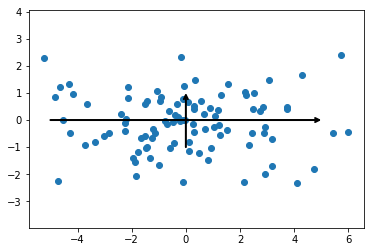

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.random.multivariate_normal([0,0],[[5,0],[0,1]],100)
plt.scatter(x[:,0], x[:, 1] )
plt.axis('equal')
draw_vector([-5, 0], [5,0])
draw_vector([0, -1], [0, 1])

Text(0.5, 0.92, 'PCA on the iris data set')

<Figure size 480x480 with 0 Axes>

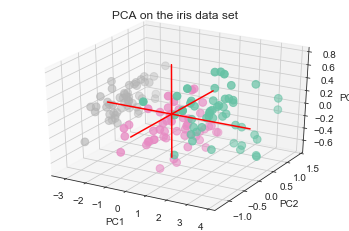

In [7]:
# libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
 
# Get the iris dataset
import seaborn as sns
sns.set_style("white")
df = sns.load_dataset('iris')
 
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# Keep the 'specie' column appart + make it numeric for coloring
df['species']=pd.Categorical(df['species'])
my_color=df['species'].cat.codes
df = df.drop('species', 1)
 
# Run The PCA
pca = PCA(n_components=3)
pca.fit(df)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
#plt.show()


![pca](https://media.giphy.com/media/Lyejb62QjQepG/giphy.gif)

- [original source]( https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/140579#140579)


- data sets on x, y are correlated
-  To draw a line through the center of $(x's, y's )$ and to project all points onto this line $w_1 x + w_2 y$ 
   - the above graph showing a line corresponding to some particular values of $w_1$  and $w_2$
- PCA is trying to find the best line according to two criteria
  1. maximize the spread (or variance): spread of the red dots on the line
  2. minimize the reconstruction of original data from the new one: the length of projection line 

[To see the data and PCA in 3D](http://setosa.io/ev/principal-component-analysis/)

## Eigenvalue of Covariance matrix is the same as the variance of its eigenvectors

\begin{align*}
    & R =return,~~ R=[r_1, r_2, \cdots, r_n]  \\
    & E(R \cdot R ) = \Sigma        
\end{align*}

\begin{align*}
   Fact: \lambda \cdot \upsilon =\Sigma \upsilon,~~ where~~ &\lambda=(eigenvalue),~~ \upsilon=(eigenvector) \\
                                                            \upsilon \upsilon' =1
\end{align*}

\begin{align*}
    E[(\upsilon R)^2] &=E[(\upsilon R)\cdot(\upsilon R)' ]  \\
                      &= E[\upsilon (R \cdot R') \upsilon'] \\
                      & = \upsilon E(R \cdot R') \upsilon' \\
                      & = \upsilon \Sigma \upsilon' \\
                      & = \lambda \upsilon \upsilon' \\
                      & = \lambda
\end{align*}

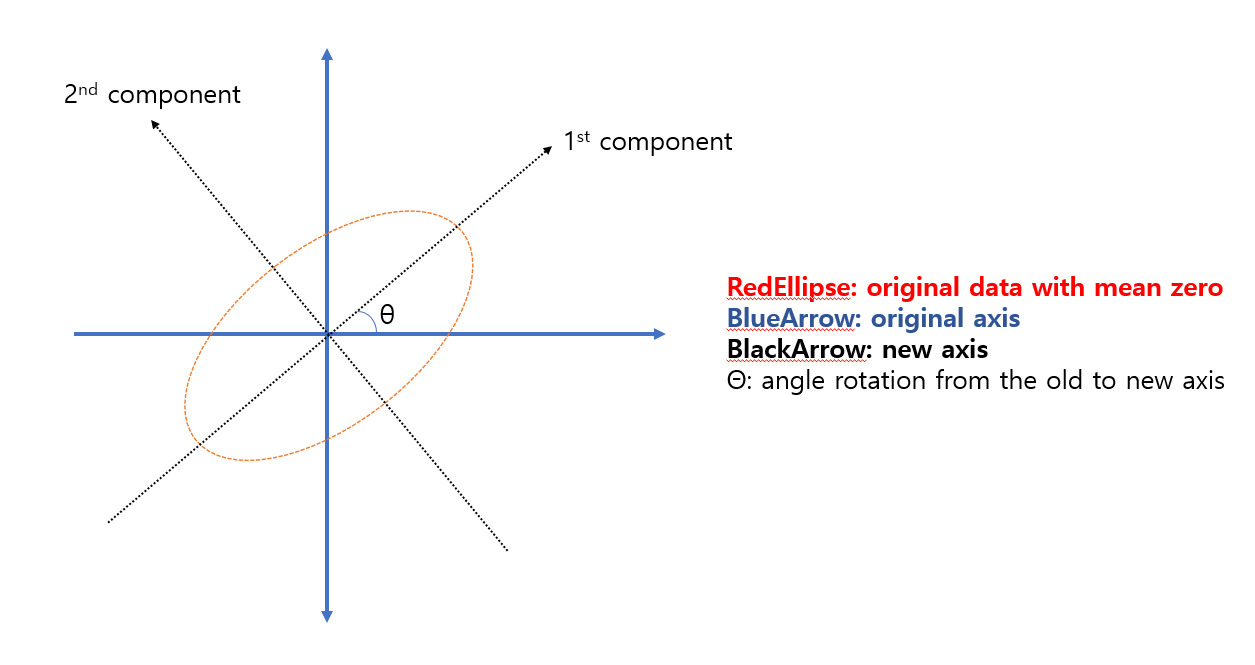

In [1]:
from IPython.display import Image
Image("c:/python/images/PCA1.PNG", width=450, height=600)

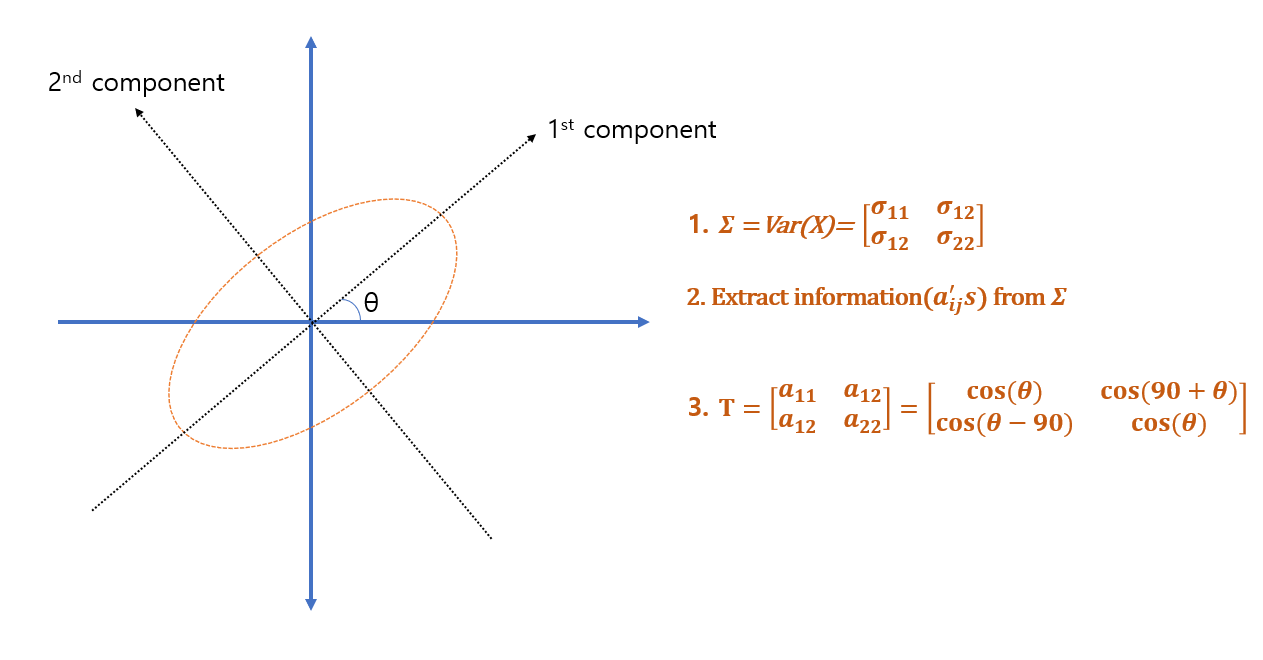

In [2]:
from IPython.display import Image
Image("c:/python/images/PCA2.PNG", width=450, height=600)

## PCA Reconstruction 

- Let $X = [X_1, X_2, \cdots,   X_N]$
- Let $\mu_i = E(X_i)$
- Tranforming the data as like: $w_i =u^T (X_i - \mu_i) $, where $\|u\|=1$(projection of demean data onto each component u: in above graph new axis)
- PCA: trying to maximize $\frac{1}{N} \sum_{i=1}^{N}w_i w_i^T $ 
 \begin{align*}
   \frac{1}{N} \sum_{i=1}^{N}w_i w_i^T&= \frac{1}{N} \sum_{i=1}^{N} \big(u^T (X_i - \mu_i)\big)\big(u^T (X_i - \mu_i)\big)^T \\
   &= u^T \Big(\frac{1}{N} (X_i - \mu_i)(X_i - \mu_i)^T  \Big)  u  \\
   &= u^T \Sigma u
 \end{align*}
 
   - The direction that maximizes the variance is the eigenvector associated with the largest eigenvalue of Σ

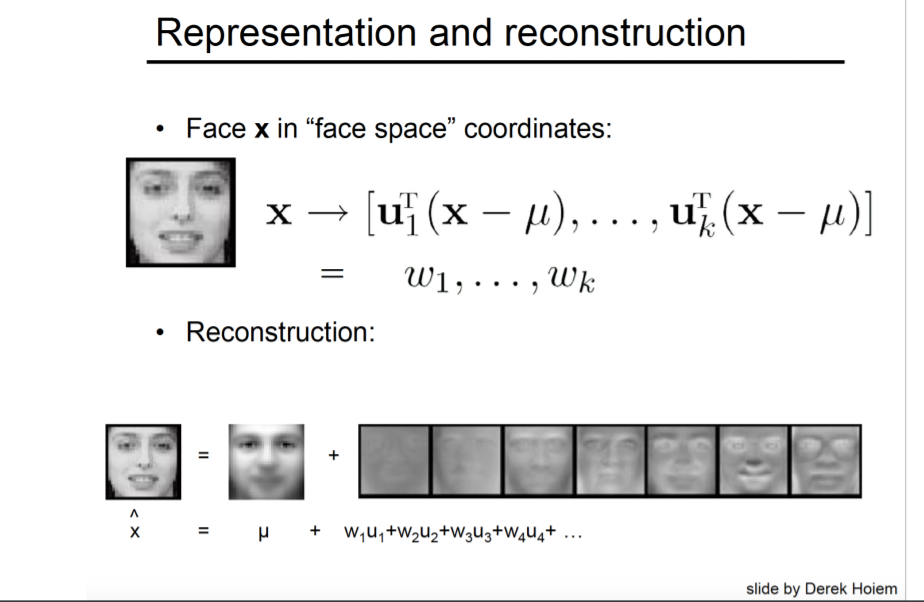

In [14]:
from IPython.display import Image
Image("c:/python/images/PCA_Reconstruction_figure.PNG")

##  PCA Example

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

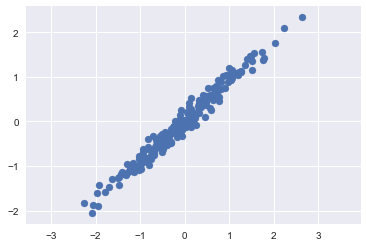

In [5]:
rng = np.random.RandomState(0)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [6]:
from sklearn.decomposition import PCA 

# PCA compute
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
# PCA: component and variance

print(pca.components_)
print('-------------')
print(pca.explained_variance_)

[[ 0.739393    0.67327408]
 [-0.67327408  0.739393  ]]
-------------
[1.48668691 0.01057775]


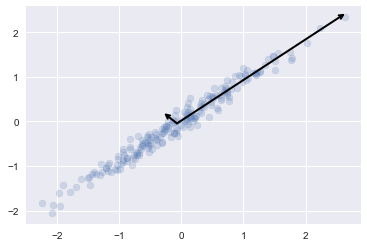

In [10]:
# want to show
# components: direction of vector
# e. variance: square length of the vector

# plot data

plt.scatter(X[:,0], X[:,1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v=vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_+v)

-  These vectors represent the principal axes of the data
-  the length of the vector is an indication of how "important" that axis is in describing the distribution of the data
    -  more precisely, it is a measure of the variance of the data when projected onto that axis. 
-  The projection of each data point onto the principal axes are the "principal components" of the data.

[(-3, 3.1),
 Text(0,0.5,'component 2'),
 (-5, 5),
 Text(0.5,0,'component 1'),
 Text(0.5,1,'principal components')]

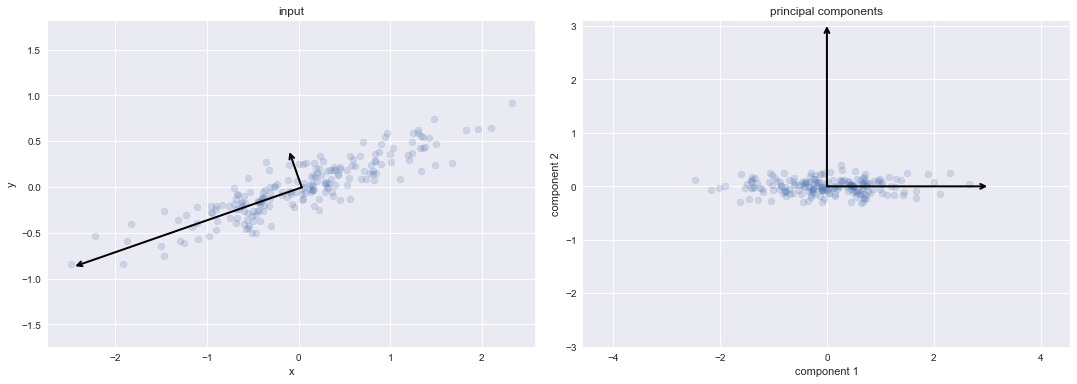

In [28]:
# plot data

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

### Dimensionality reduction

In [11]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ",  X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


(-2.506828858448312, 2.8964202864111046, -2.30264812198271, 2.6874933523113027)

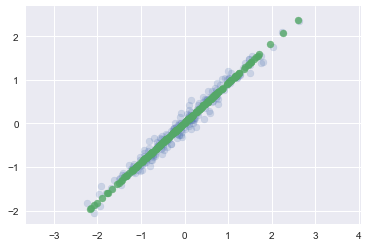

In [12]:
# inverse transform of reduced data to compare with the original data

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

In [11]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)   # https://matplotlib.org/users/annotations_guide.html
    ax.annotate('', v1, v0, arrowprops=arrowprops)

## PCA in economics

- For each eigenvalue $F_i$, run regression with economic factors, such as, market return(CAPM), or PBR or capitalization size
\begin{equation*}
F_i = \beta_1 X_1 + \beta_2 X_2  + \cdots + \beta_n X_n
\end{equation*}    


- PCA transforms data into new properties not correlated each other. Hence, it would be interpreted PCA as feature extraction makes better sense than dimension reduction.